# Business Understanding

**What is the purpose of the dataset and how was it collected?**
This data was originally collected from Spotify for analyzing behaviors between valence and other measures.  Each provided track information is derived from [Spotify's public api](https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-audio-features). There is a total of 232,725 tacks spanning 26 genres.

**What is the dataset?**
The dataset is a scraping of Spotify's tracks that detail a variety of fields such as:
* danceability
* energy
* key
* loudness
* mode
* speechiness
* acousticness
* instrumentalness
* liveness
* valence
* tempo
* type
* track_id
* artist_name
* popularity
* track_name
* genre
* duration in milliseconds

**How can we define measures from this dataset?**
We can look for patterns to valence to find associations and potential indicators that indicate "postiveness" to musical tracks. This information could be used in a variety of areas to find tracks or design songs that can aid music therapy for mood-disorders and help further future studies in effectiveness and usefulness. Below are some sample studies in music therapy:
* [Reviewing the Effectiveness of Music Interventions in Treating Depression](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5500733/)
*[Music Therapy and Other Music-Based Interventions in Pediatric Health Care: An Overview](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6473587/)
*[Music Therapy by Cleveland Clinic.](https://my.clevelandclinic.org/health/treatments/8817-music-therapy)

**How would you measure effectiveness of a good prediction algorithm?**
Potentially, a good prediction algorithm would be able to predict/project potential valence scores for musical tracks based on a variety of features. This prediction would allow for sound engineers, musicians, and therapist to create tracks designed for music therapy with an objective measure for providing patients and listeners with potential ways to handle emotional and mental strain or to express oneself better.


# Data Import and Modules Used for Analysis

In [2]:
! pip install seaborn pandas numpy matplotlib

In [15]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

# Retrieves current working directory to locate physical csv on disk
file_path = os.path.join(os.getcwd(), "SpotifyFeatures.csv")

#Loading in csv Spotify dataset
df = pd.read_csv(file_path) # read in the csv file

# Data Import Check
df.head()

C:\Users\Taylo\ML1-Lab1\SpotifyFeatures.csv


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


# 1.) Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file

**Categorical Variables:**
* **genre** - describes the genre category of the track
* **artist_name** - describes the name of the artist
* **track_name** - describes the name of the track
* **track_id** - unique track indetifier 
* **key** - describes the key/pitch the track is in
* **mode** - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**Continous Variables:**
* **popularity** - The popularity of the track. The value will be between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
* **acousticness** - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* **danceability** - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* **duration_ms** - The duration of the track in milliseconds.
* **energy** - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
* **instrumentalness** - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* **liveness** - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* **loudness** - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
* **speechiness** - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* **tempo** - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* time_signature - An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
* **valence** - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

# 2.) Verify data quality: Explain any missing values, duplicate data, and outliers.Are those mistakes? How do you deal with these problems? Be specific.

This data pulls in about 10,000 tracks per genre which totals 232,725 tracks.  Because this is a pull from an API most of the 
data is already cleaned up.  The author of the code made two separate data pulls: the track/artist information and
the audio information.  They then used an inner join to merge these two data pulls so we were only left with rows that have
data from both tables.  This will eliminate null values in our columns.  Below will check to confirm that is the case.

In [17]:
df['duration_min'] = df['duration_ms'] / 60000

df.drop(labels = 'duration_ms',axis = 1,inplace = True)

# Checking to confirm that the data set contains the correct amount of columns and rows.  
df.info()

In [19]:
# Checking for a count of nulls in each column.  There are no nulls.  
df.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
duration_min        0
dtype: int64

Next we want to check for duplicates.  Looking at the code to build this data set, they already took the steps to elimiate duplicate data so we do not expect there to be any duplicates for the entire row.  However, the way the data was pulled, there will be multiple rows listed for the same song if it has multiple genres.  This is definitely something to consider going forward.  For now, we will keep all data in the data set with the understanding that this is a problem we might have to tackle when building models.  In the two cells below, we will first check to confirm there are no complete row duplicates then after check to show the rows that have multiple genres (i.e track_ids listed more than one time.)

In [22]:
# Checking for complete row duplicates.  There are none.  
df[df.duplicated()]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_min


In [23]:
# Checking for tracks that have multiple genres for each track_id thus multiple rows in the data set.  There are 91,075 tracks.
df[df.duplicated(subset=['track_id'],keep=False)]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_min
135,R&B,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.08300,0.724,0.689,0.000000,D,0.3040,-5.922,Minor,0.1350,146.496,4/4,0.6930,4.105550
136,R&B,Rihanna,Desperado,6KFaHC9G178beAp7P0Vi5S,63,0.32300,0.685,0.610,0.000000,C,0.1020,-5.221,Minor,0.0439,94.384,3/4,0.3230,3.107783
137,R&B,Yung Bleu,Ice On My Baby (feat. Kevin Gates) - Remix,6muW8cSjJ3rusKJ0vH5olw,62,0.06750,0.762,0.520,0.000004,F,0.1140,-5.237,Minor,0.0959,75.047,4/4,0.0862,3.325333
138,R&B,Surfaces,Heaven Falls / Fall on Me,7yHqOZfsXYlicyoMt62yC6,61,0.36000,0.563,0.366,0.002430,B,0.0955,-6.896,Minor,0.1210,85.352,4/4,0.7680,4.009950
139,R&B,Olivia O'Brien,Love Myself,4XzgjxGKqULifVf7mnDIQK,68,0.59600,0.653,0.621,0.000000,B,0.0811,-5.721,Minor,0.0409,100.006,4/4,0.4660,3.565783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232715,Soul,Emily King,Down,5cA0vB8c9FMOVDWyJHgf26,42,0.55000,0.394,0.346,0.000002,E,0.1290,-13.617,Major,0.0635,90.831,4/4,0.4360,4.697550
232718,Soul,Muddy Waters,I Just Want To Make Love To You - Electric Mud...,2HFczeynfKGiM9KF2z2K7K,43,0.01360,0.294,0.739,0.004820,C,0.1380,-7.167,Major,0.0434,176.402,4/4,0.9450,4.304450
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.9620,5.437333
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.8130,2.782667


Also want to check for outliers.  These are not mistakes or data entry entry error but rather just songs that true outlers in there category.  For the purpose of this project, we will identify the outliers but keep them in the data set.  That way later on in the project when we are going to build a classification model, we will be able to run multiple models with or without outliers and compare the results.  In the code below, we will look out how many outliers there are in each column.

In [24]:
# Identifying the IQR for each column 

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Counting how many values are outliers in each column based on the calculation above.  

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


C:\Users\Taylo\anaconda3\envs\ML1\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  if __name__ == '__main__':


acousticness            0
artist_name             0
danceability            0
duration_min        14651
energy                  0
genre                   0
instrumentalness    51545
key                     0
liveness            21241
loudness            14171
mode                    0
popularity             38
speechiness         32979
tempo                 168
time_signature          0
track_id                0
track_name              0
valence                 0
dtype: int64

# 3.)  Give simple, appropriate statistics (range, mode, mean, median, variance,counts, etc.) for the most important attributes and describe what they mean or if you found something interesting. 
**Note:** You can also use data from other sources for comparison. Explain the significance of the statistics run and why they are  meaningful.

In [44]:
df.info() # There are 232725 number of rows and 18 columns
df.describe() # shows statistics of spotify data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   energy            232725 non-null  float64
 8   instrumentalness  232725 non-null  float64
 9   key               232725 non-null  object 
 10  liveness          232725 non-null  float64
 11  loudness          232725 non-null  float64
 12  mode              232725 non-null  object 
 13  speechiness       232725 non-null  float64
 14  tempo             232725 non-null  float64
 15  time_signature    232725 non-null  object 
 16  valence           23

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_min
count,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917,3.918706
std,18.189948,0.354768,0.185608,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065,1.982265
min,0.000000,0.000000,0.056900,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000,0.256450
25%,29.000000,0.037600,0.435000,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000,3.047617
50%,43.000000,0.232000,0.571000,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000,3.673783
75%,55.000000,0.722000,0.692000,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000,4.429467
max,100.000000,0.996000,0.989000,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000,92.548617


Interesting enough there are some variables (acousticness, danceability, energy, etc.) that do not reach a max value of 100, but are close. However, loudness predominantly has negative value for the predominant portions of its statistics and its maximum value being positive and extremely low value.

Lastly, looking at the duration of these tracks, there is an extremely high potential outlier of 92.5 minutes. This to us, may be a live concert or music event.

# 4 & 5.) Explore Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships. 

In [3]:
# Retrieves current working directory to locate physical csv on disk
file_path = os.path.join(os.getcwd(), "SpotifyFeatures.csv")
print(file_path)

#Loading in csv Spotify dataset
df = pd.read_csv(file_path) # read in the csv file

df.head()

C:\Users\Taylo\ML1-Lab1\SpotifyFeatures.csv


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [4]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True)

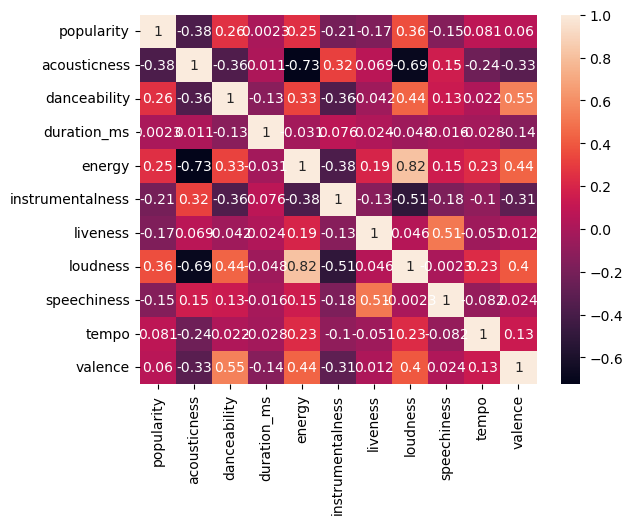

In [5]:
import matplotlib.pyplot as plt
# Correlation matrix of continous variables
correlation_mat=df.corr()
sns.heatmap(correlation_mat, annot=True)
plt.show()

As we can see, when observing valence's interaction with other variables, there are two potential positive interactions to look closer at for "positiveness": popularity, danceability, energy, and loudness. All other variables show a weaker relationship with valence. With that however, it appears danceability and energy have a strong positivecorrelation and we may want to consider if both are needed in future prediction algorithms. Further evidence of this trend can be seen in the scatterplot below

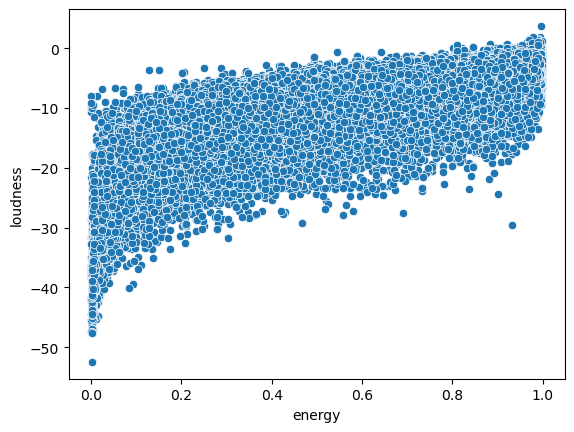

In [6]:
# Visualizing the positive relationship between energy and loudness
sns.scatterplot(x='energy', y='loudness', data=df)

plt.show()

In [7]:
# Reducing the dataset to two familiar genres to visualize the relationship by class
dfjazzrock = df[df["genre"].isin(["Jazz", "Rock"])]
dfjazzrock.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
145429,Jazz,Kelsea Ballerini,Miss Me More,5NfJGBAL9mgFPRQxKJmiX2,74,0.014,0.643,192840,0.720,0.000000,D,0.0834,-7.146,Major,0.0527,96.028,4/4,0.491
145430,Jazz,"Earth, Wind & Fire",September,5nNmj1cLH3r4aA4XDJ2bgY,79,0.114,0.697,214827,0.809,0.000521,A,0.1830,-8.197,Major,0.0302,125.941,4/4,0.980
145431,Jazz,Leslie Odom Jr.,Alexander Hamilton,4TTV7EcfroSLWzXRY6gLv6,72,0.524,0.609,236738,0.435,0.000000,B,0.1180,-7.862,Minor,0.2840,131.998,4/4,0.563
145432,Jazz,Etta James,At Last,4Hhv2vrOTy89HFRcjU3QOx,74,0.707,0.171,182400,0.330,0.003810,F,0.3020,-9.699,Major,0.0329,174.431,3/4,0.315
145433,Jazz,Leslie Odom Jr.,Wait for It,7EqpEBPOohgk7NnKvBGFWo,69,0.125,0.561,193750,0.474,0.000005,F#,0.0922,-9.638,Major,0.1550,86.897,4/4,0.513


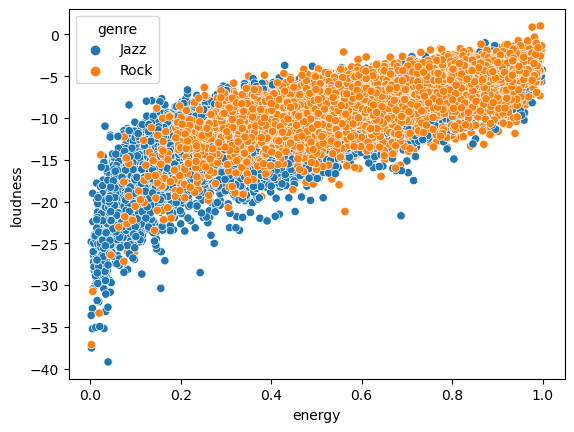

In [8]:
# Visualizing the relationship between loudness and energy for Jazz and Rock songs. We see two clusters, where Rock songs seem to have higher energy and loudness
sns.scatterplot(x='energy', y='loudness', data=dfjazzrock, hue='genre')

plt.show()

Here, we took a closer look at the positive trend of loudness and energy to what genres they could be. It looks like rock tends to have a higher energy and loudness than jazz, but overall they are closely related clusters.

In [9]:
# Cross-tabulation of genre and key. Key C# might be an indicator of spoken word as it as high countsd in the comedy and hip-hop genres.
pd.crosstab(df.genre, df.key, margins=True, margins_name="Total")

key,A,A#,B,C,C#,D,D#,E,F,F#,G,G#,Total
genre,,,,,,,,,,,,,
A Capella,9,10,10,15,8,13,5,6,14,4,15,10,119
Alternative,865,510,844,1045,972,981,265,705,703,727,1024,622,9263
Anime,868,537,658,1041,810,953,297,683,855,607,1037,590,8936
Blues,1233,458,610,1175,520,1150,224,751,801,365,1311,425,9023
Children's Music,495,340,201,979,227,731,211,405,614,136,834,230,5403
Children’s Music,905,531,855,1065,965,978,269,732,692,730,1004,627,9353
Classical,853,664,440,1112,730,1122,578,805,901,443,1138,470,9256
Comedy,823,813,647,558,1489,903,415,753,802,1238,676,564,9681
Country,927,464,598,946,619,1090,313,834,607,560,1207,499,8664


In [10]:
# Cross-tabulation with mean popularity measure. No huge popularity differences by key, mainly just bewteen genres.
pd.crosstab(df.genre, df.key, values=df.popularity, aggfunc='mean').round(0)

key,A,A#,B,C,C#,D,D#,E,F,F#,G,G#
genre,,,,,,,,,,,,
A Capella,8.0,8.0,8.0,8.0,8.0,10.0,6.0,8.0,12.0,14.0,9.0,12.0
Alternative,50.0,51.0,50.0,50.0,50.0,50.0,50.0,51.0,50.0,50.0,50.0,50.0
Anime,24.0,24.0,25.0,23.0,25.0,24.0,24.0,24.0,24.0,26.0,24.0,25.0
Blues,35.0,34.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,34.0,34.0,36.0
Children's Music,4.0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,5.0
Children’s Music,54.0,55.0,55.0,54.0,54.0,55.0,55.0,55.0,55.0,55.0,55.0,54.0
Classical,29.0,28.0,29.0,29.0,30.0,29.0,28.0,31.0,29.0,28.0,30.0,29.0
Comedy,21.0,20.0,20.0,21.0,21.0,22.0,22.0,22.0,22.0,22.0,22.0,21.0
Country,46.0,46.0,48.0,46.0,47.0,46.0,47.0,45.0,46.0,47.0,46.0,46.0


In [11]:
# Grouping by genre and finding group means
grouped_df = df.groupby("genre")
mean_df = grouped_df.mean()
mean_df = mean_df.reset_index()

mean_df.head()

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,A Capella,9.302521,0.829941,0.412252,204467.697479,0.250313,0.007491,0.136924,-13.660387,0.042414,111.518950,0.328724
1,Alternative,50.213430,0.162313,0.541898,233241.364245,0.711519,0.061303,0.196985,-6.540803,0.088783,122.534485,0.449590
2,Anime,24.258729,0.286843,0.472090,229937.067927,0.665356,0.280592,0.192391,-7.917802,0.065102,126.629156,0.441682
3,Blues,34.742879,0.327840,0.528232,251931.826000,0.606171,0.095175,0.233125,-9.053807,0.061809,121.137637,0.579425
4,Children's Music,4.252637,0.591781,0.697475,142726.774200,0.396880,0.143572,0.164894,-11.641760,0.117279,121.131288,0.675956


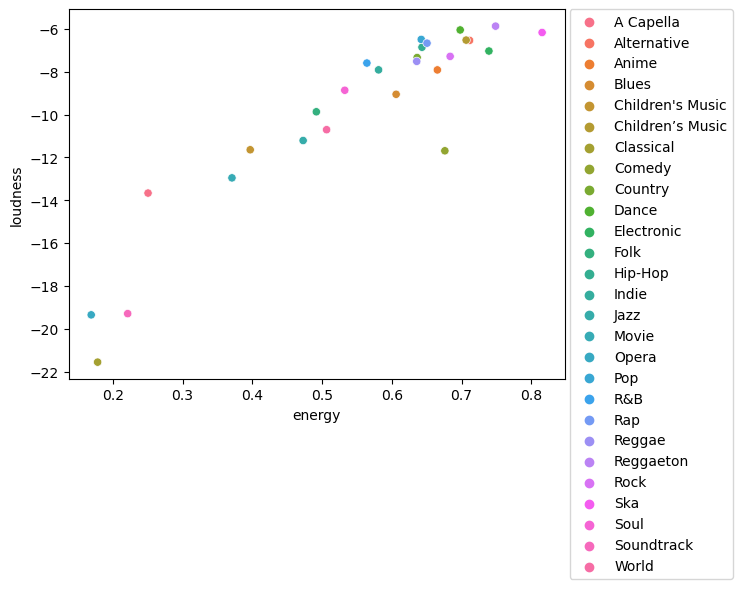

In [12]:
# Mean eneger vs. Mean Loudness by genre. We see a positive relationship between loudness and energy, with three genre outliers bottomw left.
sns.scatterplot(x='energy', y='loudness', data=mean_df, hue='genre',legend=True)
plt.legend(loc='right')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.show()

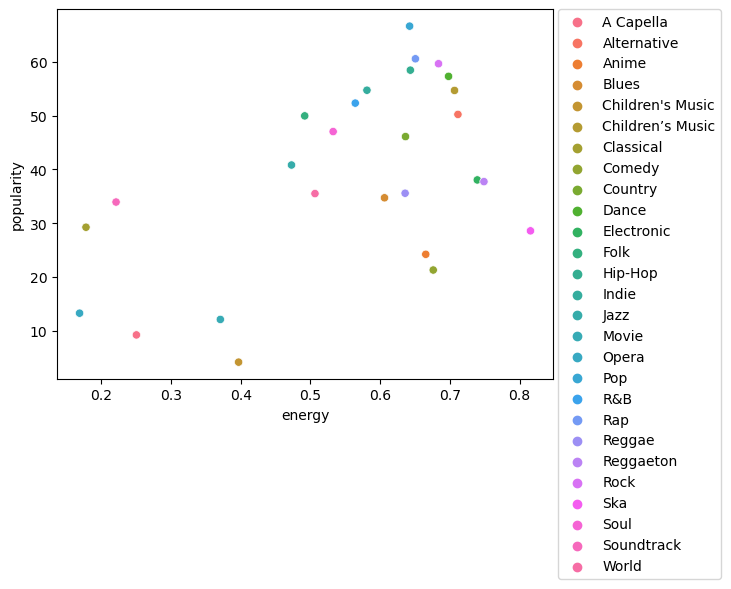

In [13]:
# There seems to be a somewhat positive relationship between energy and popularity. There almost seem to be two genre clusters.
sns.scatterplot(x='energy', y='popularity', data=mean_df, hue='genre',legend=True)
plt.legend(loc='right')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.show()

# 6.) Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).
For this project we are going to use genre as the class that we try and predict.  There are 26 genres so we anticipate this to be a difficult classification model. Because there are so many classes and various features we will first look at which features might have the most impact and then drill down further into those relationships. The code below will look at relationships between the other features of the data set and the target classification of music genre.  

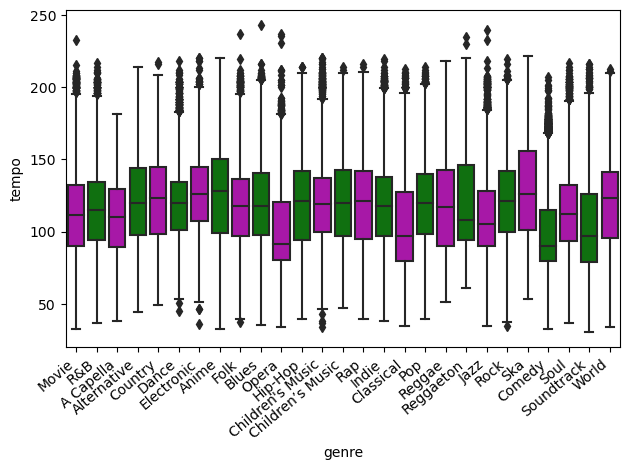

In [25]:
# Checking the box plots of tempo and our target genre.  There doesn't appear to be a lot of separation here so will not dive
# deeper into this relationship.

ax = sns.boxplot(x="genre", y="tempo",
             palette=["m", "g"],
            data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

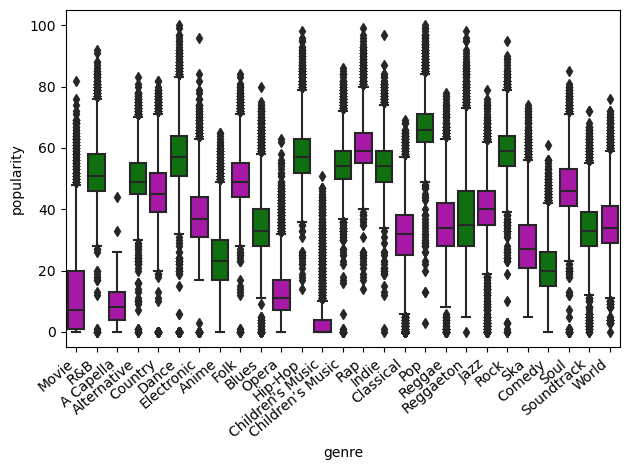

In [26]:
# Checking the box plots of popularity and our target genre.  There does appear to be some good distinction here so will look 
# further at popularity vs. genre. 

ax = sns.boxplot(x="genre", y="popularity",
             palette=["m", "g"],
            data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

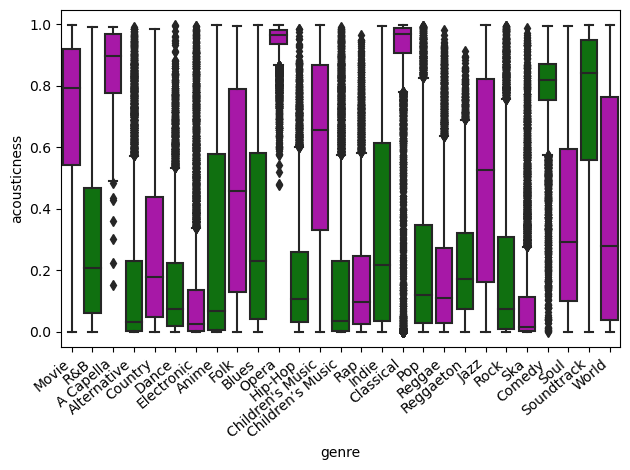

In [27]:
# Checking the box plots of acousticness and our target genre.  There seems to be quite a bit of variance that could lead
# to some noise when building the model.  WIll not look at this feature further.  

ax = sns.boxplot(x="genre", y="acousticness",
             palette=["m", "g"],
            data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

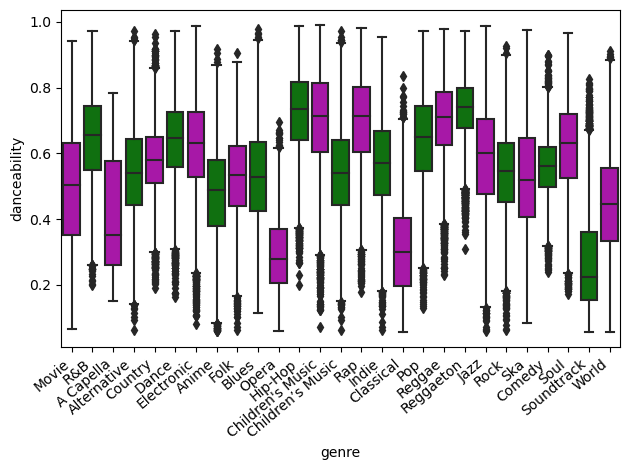

In [28]:
# Checking the box plots of danceability and our target genre.  There is some distinct differences in the genres here and 
# warrants a further look.

ax = sns.boxplot(x="genre", y="danceability",
             palette=["m", "g"],
            data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

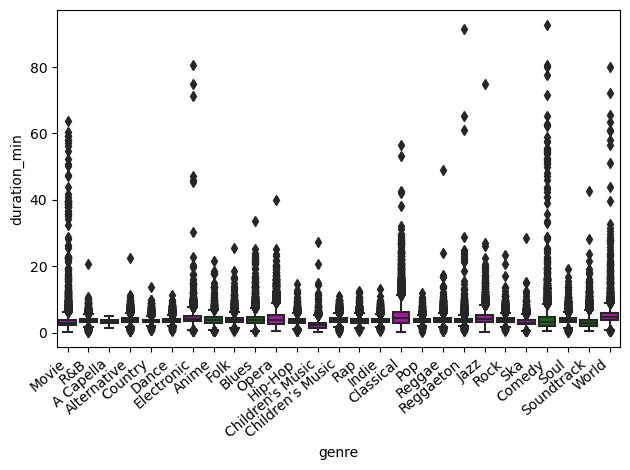

In [29]:
# Checking the box plots of duration_min and our target genre.  There seems to be a very tight spread for all features but then
# also a lot of outliers.  Will not look at this one further. 

ax = sns.boxplot(x="genre", y="duration_min",
             palette=["m", "g"],
            data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

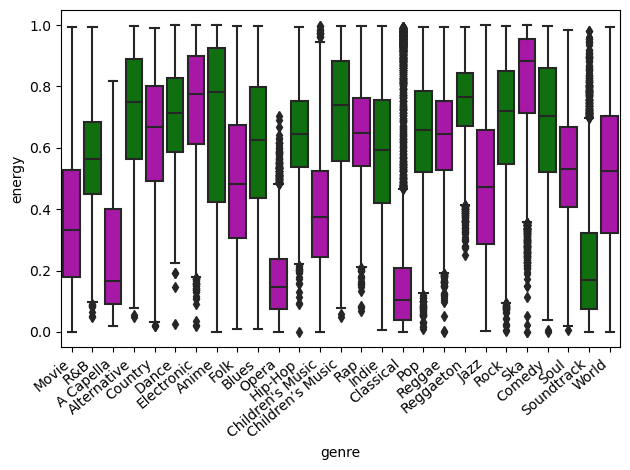

In [30]:
# Checking the box plots of energy and our target genre.  This feature has some distinct characteristics and warrants a 
# further look. 

ax = sns.boxplot(x="genre", y="energy",
             palette=["m", "g"],
            data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

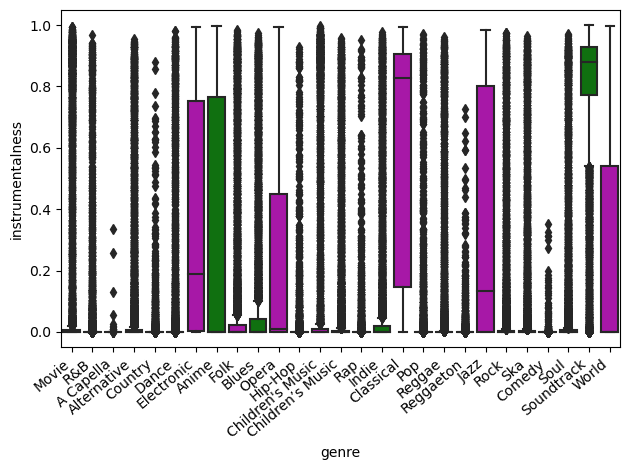

In [31]:
# Checking the box plots of instrumentalness and our target genre.  There is a lot of overlap here but I think it will 
# provide interesting insight on some genres that haven't popped in some of the other charts.  

ax = sns.boxplot(x="genre", y="instrumentalness",
             palette=["m", "g"],
            data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

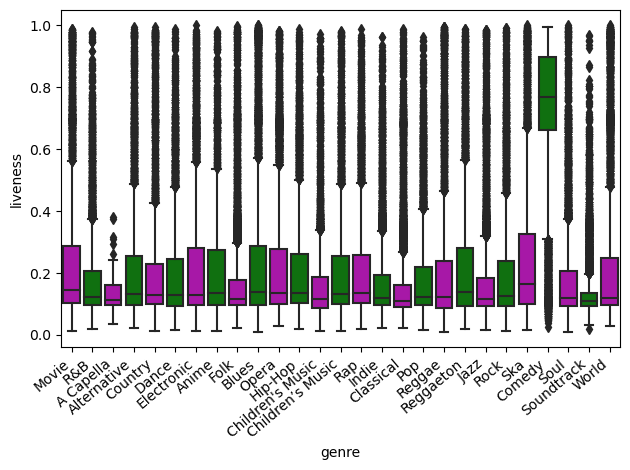

In [32]:
# Checking the box plots of liveness and our target genre. Really the only distinct classification here is 'Soul' which has
# a very high liveness value on average.  Will look at this feature further because of that. 

ax = sns.boxplot(x="genre", y="liveness",
             palette=["m", "g"],
            data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

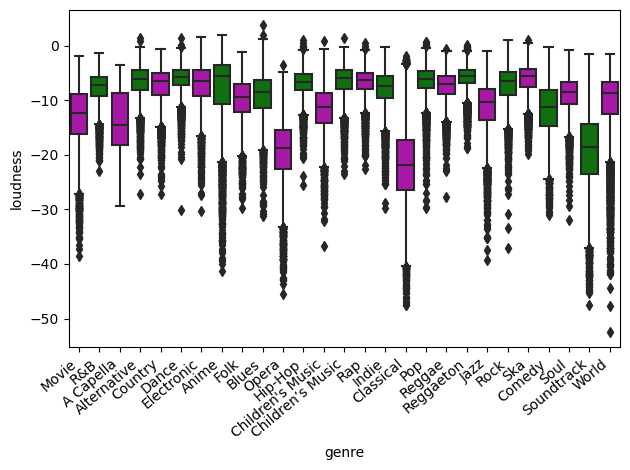

In [33]:
# Checking the box plots of loudness and our target genre.  There does appear to be some good distinction here so will look 
# further at loudness vs. genre. 

ax = sns.boxplot(x="genre", y="loudness",
             palette=["m", "g"],
            data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

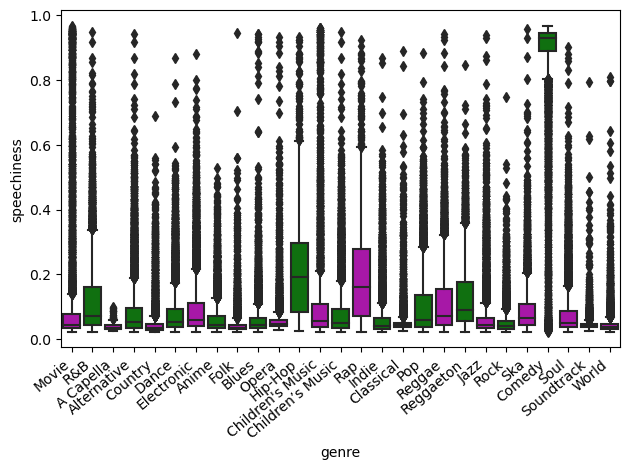

In [34]:
# Checking the box plots of speechiness and our target genre.  Its good to see that there are 5 or so classes that really stick
# out here.  For that reason will also look at this feature further.  

ax = sns.boxplot(x="genre", y="speechiness",
             palette=["m", "g"],
            data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

## Looking at popularity, danceability, energy, liveness, loudness, speechiness , and instrumentalness
### Popularity vs. Genre
Can see in the above chart that the pop genre has the highest median popularity.  This is expected as it is the most common type of music to hear over the radio and on the charts.  There are 4 genres that stick out as being very low compared to the other genres and those are: Children's Music, Movie, A Capella, and Opera.  I think this shows an interesting relationship between popularity and our target variable of genre as there are clearly some genres that are just more popular than others.  

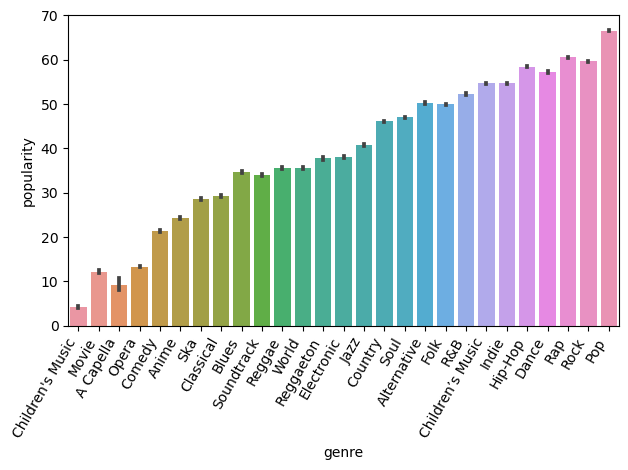

In [36]:
result = df.groupby(["genre"])['popularity'].aggregate(np.median).reset_index().sort_values('popularity')
ax = sns.barplot(x='genre', y="popularity", data=df, order=result['genre'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.tight_layout()
plt.show()

### Danceability vs. Genre
While there are some genres with similar danceability, we still some clear distinction between the most danceable songs and the lease danceable songs.  We see that soundtrack, opera, and classical genres have pretty low danceability while there are 5 genres that have a higher median than the next grou and those are: Reggae, Children's Music, Rap, Hip-Hop, Reggaeton.  This will be another good feature to put in a final model.  

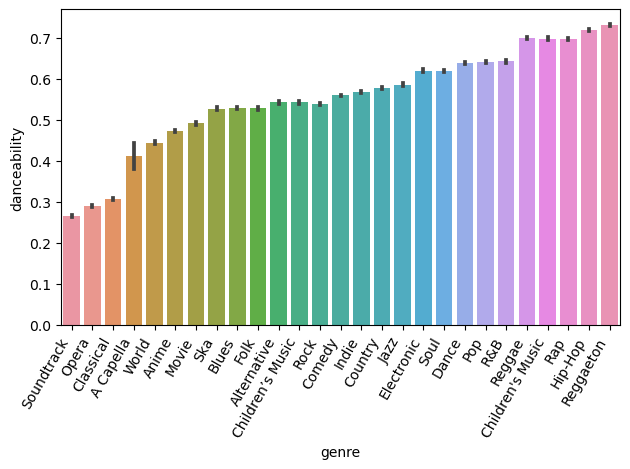

In [37]:
result = df.groupby(["genre"])['danceability'].aggregate(np.median).reset_index().sort_values('danceability')
ax = sns.barplot(x='genre', y="danceability", data=df, order=result['genre'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.tight_layout()
plt.show()

### Energy vs. Genre
There are a couple levels of energy that provide some good distinction in value between the different genres. We see that Ska has higher median energy that the next level of Anime, Electronic, and Reggaeton.  Then there is anothe clear distinction at the bottom with Classical, Opera, A Capella, and Soundtrack.  This is another feature that when combined with the others will be used as a tool.  

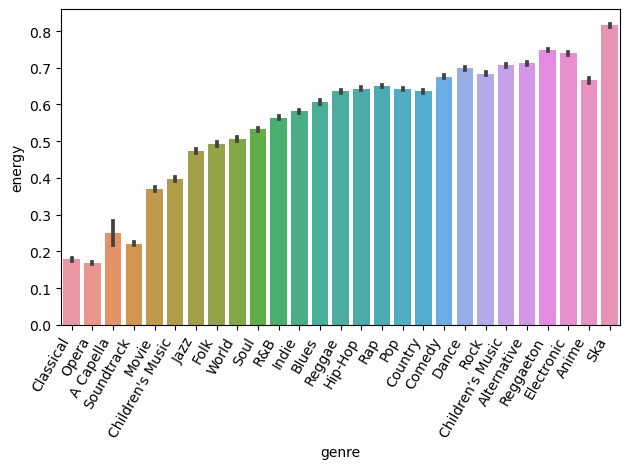

In [38]:
result = df.groupby(["genre"])['energy'].aggregate(np.median).reset_index().sort_values('energy')
ax = sns.barplot(x='genre', y="energy", data=df, order=result['genre'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.tight_layout()
plt.show()

### Liveness vs. Genre
Here we see that there is virtually no difference in the median liveness value for all genres except for comedy.  Comedy tracks look to have a median value that is 3x more than the rest of the genres.  This feature will be good to combine with speechiness below as a way to isolate comedy tracks in our model.  Not sure if we will need both.  

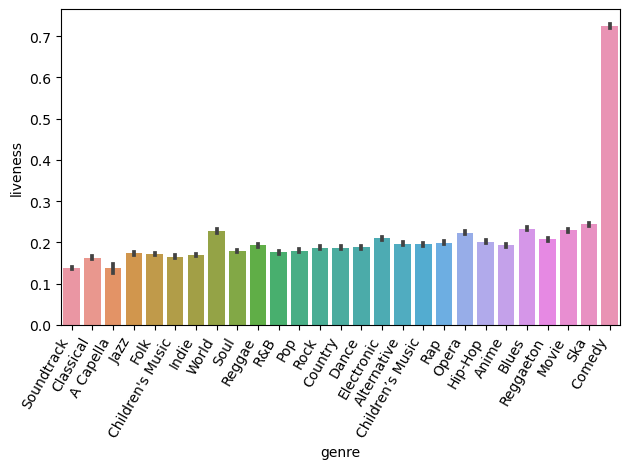

In [39]:
result = df.groupby(["genre"])['liveness'].aggregate(np.median).reset_index().sort_values('liveness')
ax = sns.barplot(x='genre', y="liveness", data=df, order=result['genre'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.tight_layout()
plt.show()

### Loudness vs. Genre
This is an intersting view as we see that Classical, Opera, and Soundtrack are the softest genres when looking at the median.  Then we see a gradual increase across genres until we get to some of the louder genres such as Reggaeton, Anime, and Ska.  With that clear distinction in the softest genres this feature could have some god value when building the model.  

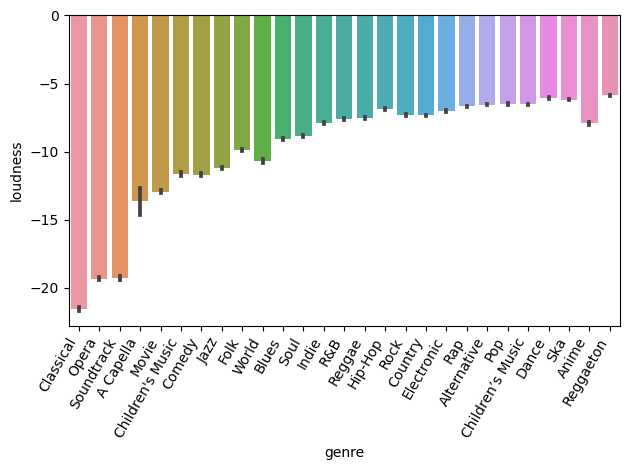

In [40]:
result = df.groupby(["genre"])['loudness'].aggregate(np.median).reset_index().sort_values('loudness')
ax = sns.barplot(x='genre', y="loudness", data=df, order=result['genre'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.tight_layout()
plt.show()

### Speechiness vs. Genre
You can see there is not a lot of distinction of the speechiness between the different genres.  There is one genre that really stands out with a much higher median value than all the rest and that is comedy.  This is a really interesting relationship to see as there is a high liklihood that any track with a speechiness value higher than 0.2 we can say with confidence that it is probably in the comedy category.  Rap and Hip Hop are the next highest genres but still nothing close to comedy.  

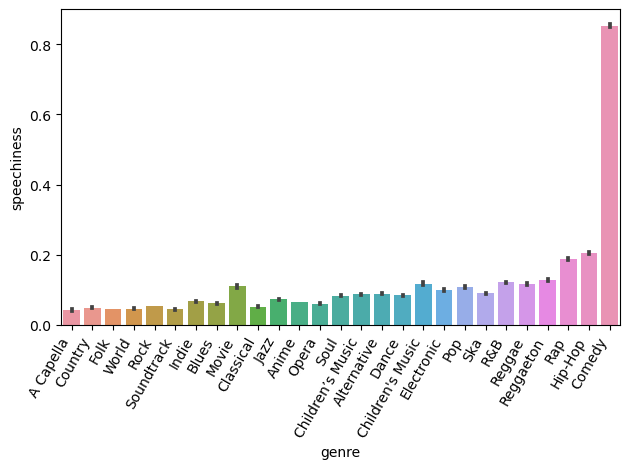

In [41]:
result = df.groupby(["genre"])['speechiness'].aggregate(np.median).reset_index().sort_values('speechiness')
ax = sns.barplot(x='genre', y="speechiness", data=df, order=result['genre'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.tight_layout()
plt.show()

### Instrumentalness vs. Genre
This seems like it will be a really good category for classification as the median intrumentalness by genre shows some clear differences in each genre.  There are a group of songs at the bottom that we generally saw with higher values for features like popularity and danciness that have a low score here.  Then we see a top level of Soundtrack, Classical, Electronic, and Jazz that have a median value that is a good amount higher than the next level.  Based off the characteristics herei think this will be a good feature to include in the model.  

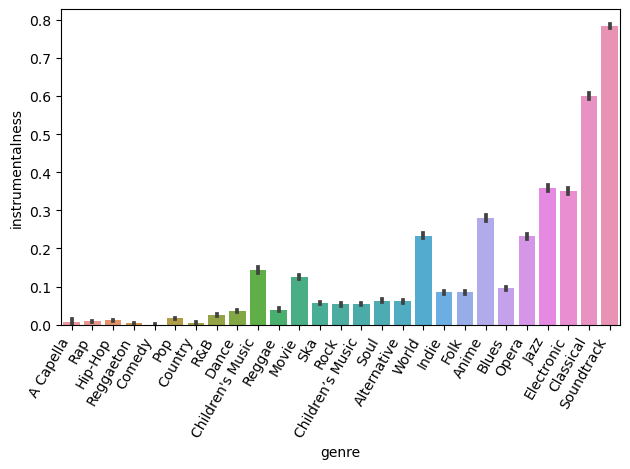

In [43]:
result = df.groupby(["genre"])['instrumentalness'].aggregate(np.median).reset_index().sort_values('instrumentalness')
ax = sns.barplot(x='genre', y="instrumentalness", data=df, order=result['genre'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.tight_layout()
plt.show()